In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [17]:
gold_data = pd.read_csv('gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
gold_data.shape

(2290, 6)

In [19]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [20]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [21]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [22]:
gold_data = gold_data.drop(columns = 'Date')

<Axes: >

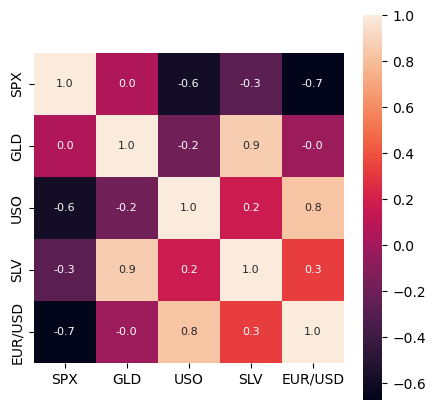

In [25]:
corr = gold_data.corr()
plt.figure(figsize = (5,5))
sns.heatmap(corr, cbar= True, square = True, fmt = '.1f', annot = True, annot_kws= {'size':8})

In [26]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [28]:
data = gold_data.drop(columns = 'GLD', axis = 1)
label = gold_data['GLD']
data.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [29]:
label.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [32]:
data_train,data_test,label_train,label_test = train_test_split(data,label,test_size=0.1,random_state=2)
print(data.shape,data_train.shape,data_test.shape)
print(label.shape,label_train.shape,label_test.shape)

(2290, 4) (2061, 4) (229, 4)
(2290,) (2061,) (229,)


In [33]:
regressor = RandomForestRegressor(n_estimators=100)

In [34]:
regressor.fit(data_train,label_train)

RandomForestRegressor()

In [36]:
training_data_prediction = regressor.predict(data_train)
training_data_accuracy = metrics.r2_score(training_data_prediction,label_train)
print("R Squared error for training data is ",training_data_accuracy)

testing_data_prediction = regressor.predict(data_test)
testing_data_accuracy = metrics.r2_score(testing_data_prediction,label_test)
print("R Squared error for testing data is ",testing_data_accuracy)

R Squared error for training data is  0.9986115376709231
R Squared error for testing data is  0.9890363577915511
